In [ ]:
!pip install statsmodels # install the statsmodels library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.mosaicplot import mosaic

In [6]:
from google.colab import files
uploaded = files.upload()

Saving nhanes_reduced .zip to nhanes_reduced .zip


In [7]:
import os
import zipfile
zip_file = 'nhanes_reduced .zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('data')

In [ ]:
os.listdir('data')

['nhanes_reduced .csv']

In [10]:
df = pd.read_csv('data/nhanes_reduced .csv')
df.head()

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Education,MaritalStatus,HHIncome,HHIncomeMid,...,PhysActiveDays,TVHrsDay,SleepHrsNight,SleepTrouble,CompHrsDay,TVHrsDayChild,CompHrsDayChild,SmokeNow,Smoke100,Smoke100n
0,51624,2009_10,male,34,30-39,409.0,High School,Married,25000-34999,30000.0,...,NaN,NaN,4.0,Yes,NaN,NaN,NaN,No,Yes,Smoker
1,51625,2009_10,male,4,0-9,49.0,NaN,NaN,20000-24999,22500.0,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN
2,51630,2009_10,female,49,40-49,596.0,Some College,LivePartner,35000-44999,40000.0,...,NaN,NaN,8.0,Yes,NaN,NaN,NaN,Yes,Yes,Smoker
3,51638,2009_10,male,9,0-9,115.0,NaN,NaN,75000-99999,87500.0,...,NaN,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN
4,51646,2009_10,male,8,0-9,101.0,NaN,NaN,55000-64999,60000.0,...,NaN,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN


In [11]:
df.tail(30)

,ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Education,MaritalStatus,HHIncome,HHIncomeMid,...,PhysActiveDays,TVHrsDay,SleepHrsNight,SleepTrouble,CompHrsDay,TVHrsDayChild,CompHrsDayChild,SmokeNow,Smoke100,Smoke100n
6749,71816,2011_12,male,2,0-9,NaN,NaN,NaN,25000-34999,30000.0,...,3.0,0_to_1_hr,NaN,NaN,0_hrs,NaN,NaN,NaN,NaN,NaN
6750,71820,2011_12,male,47,40-49,NaN,College Grad,Married,more 99999,100000.0,...,2.0,4_hr,8.0,No,More_4_hr,NaN,NaN,NaN,No,Non-Smoker
6751,71822,2011_12,female,19,Oct-19,NaN,NaN,NaN,5000-9999,7500.0,...,2.0,More_4_hr,6.0,No,4_hr,NaN,NaN,NaN,NaN,NaN
6752,71823,2011_12,female,4,0-9,NaN,NaN,NaN,75000-99999,87500.0,...,NaN,1_hr,NaN,NaN,0_to_1_hr,NaN,NaN,NaN,NaN,NaN
6753,71825,2011_12,female,53,50-59,NaN,9 - 11th Grade,Married,65000-74999,70000.0,...,2.0,More_4_hr,6.0,No,4_hr,NaN,NaN,Yes,Yes,Smoker
6754,71826,2011_12,female,77,70,NaN,9 - 11th Grade,Widowed,0-4999,2500.0,...,NaN,More_4_hr,10.0,No,0_hrs,NaN,NaN,No,Yes,Smoker
6755,71828,2011_12,female,49,40-49,NaN,High School,Married,35000-44999,40000.0,...,4.0,2_hr,6.0,No,0_to_1_hr,NaN,NaN,NaN,No,Non-Smoker
6756,71833,2011_12,female,30,30-39,NaN,College Grad,Married,65000-74999,70000.0,...,NaN,1_hr,8.0,No,2_hr,NaN,NaN,NaN,No,Non-Smoker
6757,71835,2011_12,female,17,Oct-19,NaN,NaN,NaN,5000-9999,7500.0,...,NaN,More_4_hr,7.0,No,More_4_hr,NaN,NaN,NaN,NaN,NaN
6758,71839,2011_12,female,57,50-59,NaN,College Grad,NeverMarried,45000-54999,50000.0,...,NaN,3_hr,6.0,Yes,0_to_1_hr,NaN,NaN,NaN,No,Non-Smoker


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6779 entries, 0 to 6778
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6779 non-null   int64  
 1   SurveyYr         6779 non-null   object 
 2   Gender           6779 non-null   object 
 3   Age              6779 non-null   int64  
 4   AgeDecade        6530 non-null   object 
 5   AgeMonths        3549 non-null   float64
 6   Education        4645 non-null   object 
 7   MaritalStatus    4650 non-null   object 
 8   HHIncome         6194 non-null   object 
 9   HHIncomeMid      6194 non-null   float64
 10  Poverty          6261 non-null   float64
 11  HomeRooms        6731 non-null   float64
 12  HomeOwn          6735 non-null   object 
 13  Work             5046 non-null   object 
 14  Weight           6724 non-null   float64
 15  Height           6481 non-null   float64
 16  BMI              6475 non-null   float64
 17  BMI_WHO       

In [20]:

nhanes = df['Education'].value_counts()
print(nhanes)

Education
Some College      1423
College Grad      1246
High School        993
9 - 11th Grade     624
8th Grade          359
Name: count, dtype: int64


In [ ]:
frequency_tabs = pd.crosstab(df['Gender'], 'wallace')
print(frequency_tabs)

col_0   wallace
Gender         
female     3420
male       3359


In [13]:
frequency_tab = pd.crosstab(df['HHIncome'], df['Education'],)
print(frequency_tab)

Education    8th Grade  9 - 11th Grade  College Grad  High School  \
HHIncome                                                            
0-4999              15              26            13           21   
10000-14999         35              64            14           95   
15000-19999         46              57            31           74   
20000-24999         45              61            25           80   
25000-34999         55              77            66          119   
35000-44999         32              56            85          114   
45000-54999         17              46            80           86   
5000-9999           23              34             8           35   
55000-64999         12              32            75           62   
65000-74999          8              25            81           46   
75000-99999          8              37           196           73   
more 99999           8              32           497           99   

Education    Some College  
HHInc

In [14]:
total = frequency_tab.sum().sum()
print(total)

4230


In [15]:
percentage = (frequency_tab / total) * 100
print(percentage)

Education    8th Grade  9 - 11th Grade  College Grad  High School  \
HHIncome                                                            
0-4999        0.354610        0.614657      0.307329     0.496454   
10000-14999   0.827423        1.513002      0.330969     2.245863   
15000-19999   1.087470        1.347518      0.732861     1.749409   
20000-24999   1.063830        1.442080      0.591017     1.891253   
25000-34999   1.300236        1.820331      1.560284     2.813239   
35000-44999   0.756501        1.323877      2.009456     2.695035   
45000-54999   0.401891        1.087470      1.891253     2.033097   
5000-9999     0.543735        0.803783      0.189125     0.827423   
55000-64999   0.283688        0.756501      1.773050     1.465721   
65000-74999   0.189125        0.591017      1.914894     1.087470   
75000-99999   0.189125        0.874704      4.633570     1.725768   
more 99999    0.189125        0.756501     11.749409     2.340426   

Education    Some College  
HHInc

In [16]:
frequency_tab = pd.crosstab(df['HHIncome'], df['Education'],normalize=True)
print(frequency_tab)

Education    8th Grade  9 - 11th Grade  College Grad  High School  \
HHIncome                                                            
0-4999        0.003546        0.006147      0.003073     0.004965   
10000-14999   0.008274        0.015130      0.003310     0.022459   
15000-19999   0.010875        0.013475      0.007329     0.017494   
20000-24999   0.010638        0.014421      0.005910     0.018913   
25000-34999   0.013002        0.018203      0.015603     0.028132   
35000-44999   0.007565        0.013239      0.020095     0.026950   
45000-54999   0.004019        0.010875      0.018913     0.020331   
5000-9999     0.005437        0.008038      0.001891     0.008274   
55000-64999   0.002837        0.007565      0.017730     0.014657   
65000-74999   0.001891        0.005910      0.019149     0.010875   
75000-99999   0.001891        0.008747      0.046336     0.017258   
more 99999    0.001891        0.007565      0.117494     0.023404   

Education    Some College  
HHInc

Text(0.5, 1.0, 'Education')

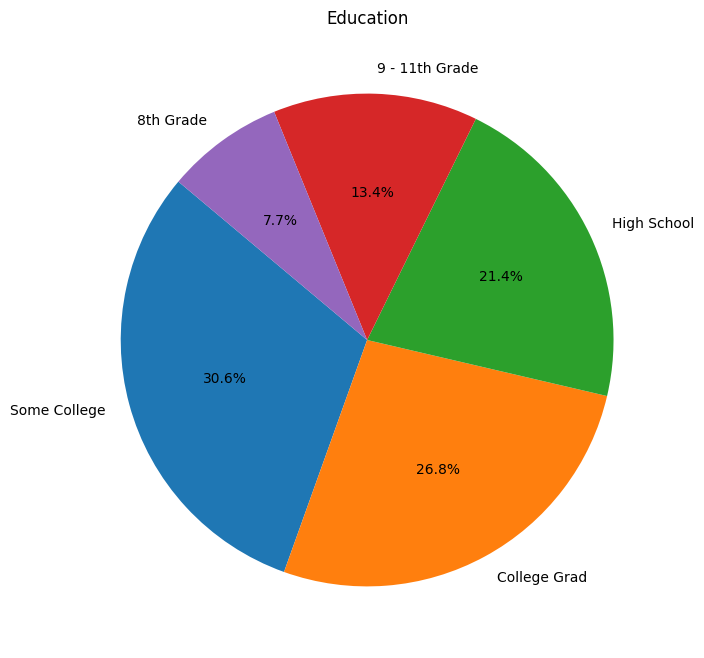

In [21]:
## plotting education
plt.figure(figsize=(8,8))
plt.pie(nhanes,labels=nhanes.index,autopct='%1.1f%%',startangle=140)
plt.title('Education')

<function matplotlib.pyplot.show(close=None, block=None)>

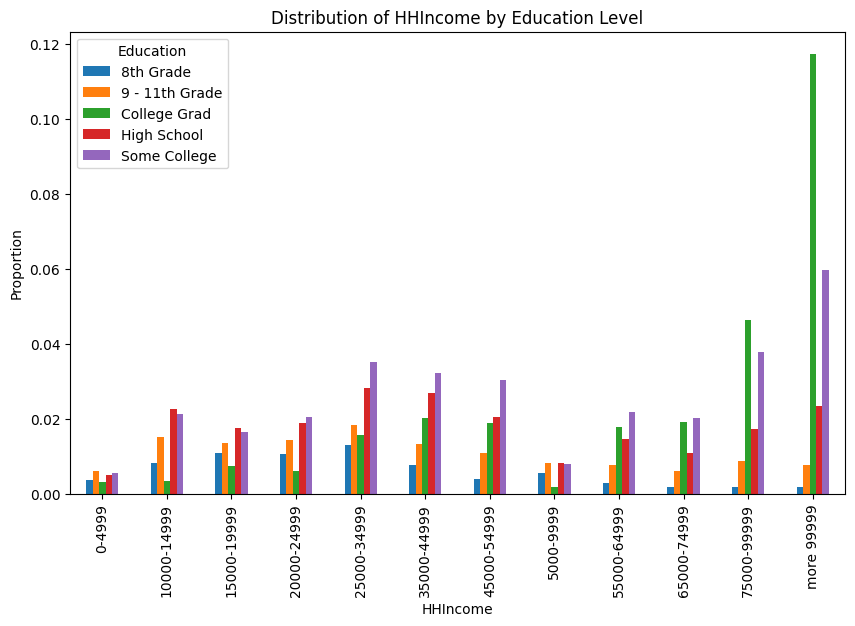

In [22]:
import matplotlib.pyplot as plt

# Plotting the bar graph
frequency_tab.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('Distribution of HHIncome by Education Level')
plt.xlabel('HHIncome')
plt.ylabel('Proportion')

# Displaying the plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

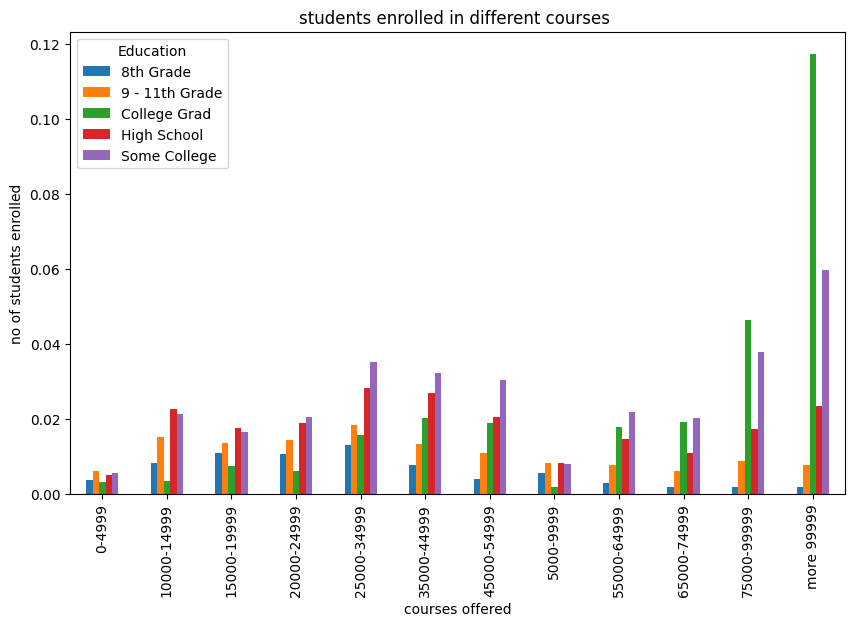

In [23]:

# Plotting the bar graph
frequency_tab.plot(kind='bar', figsize=(10, 6))

# Adding titles and labels
plt.title('students enrolled in different courses ')
plt.xlabel('courses offered')
plt.ylabel('no of students enrolled')

# Displaying the plot
plt.show

"plt.title('Distribution of HHIncome by Education Level')\nplt.xlabel('HHIncome')\nplt.ylabel('Proportion')\nplt.show()"

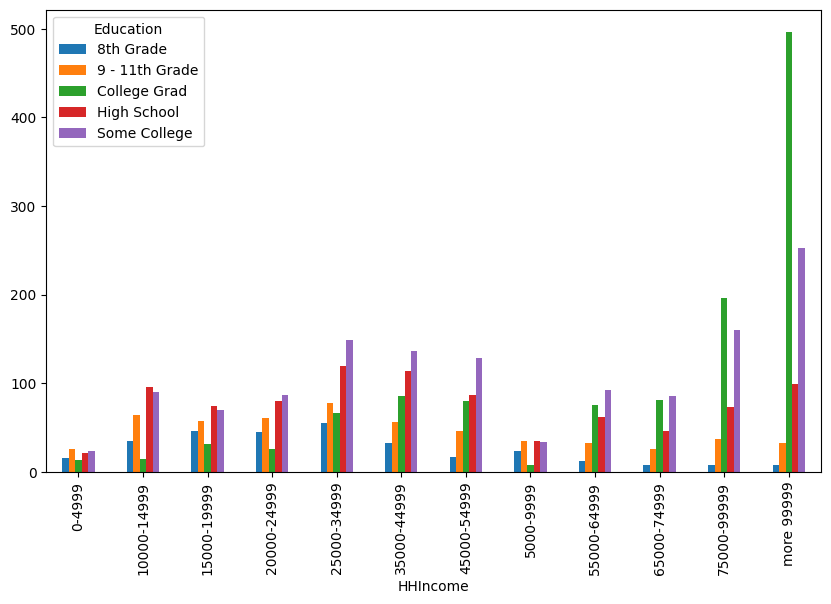

In [24]:
#group by hhincome and education
grouped_data = df.groupby(['HHIncome', 'Education']).size().unstack()
grouped_data.plot(kind='bar', figsize=(10, 6))
'''plt.title('Distribution of HHIncome by Education Level')
plt.xlabel('HHIncome')
plt.ylabel('Proportion')
plt.show()'''

<Axes: xlabel='HHIncome'>

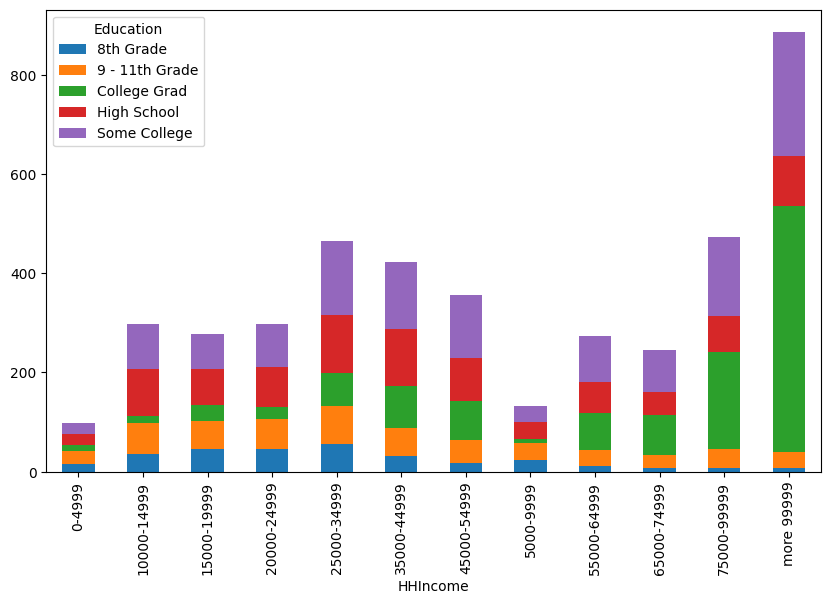

In [25]:
#group by hhincome and education
grouped_data = df.groupby(['HHIncome', 'Education']).size().unstack() # Remove the incorrect assignment
grouped_data.plot(kind='bar',stacked = True, figsize=(10, 6))

In [26]:
education_groups = df['Education'].unique()
print(education_groups)

['High School' nan 'Some College' 'College Grad' '9 - 11th Grade'
 '8th Grade']


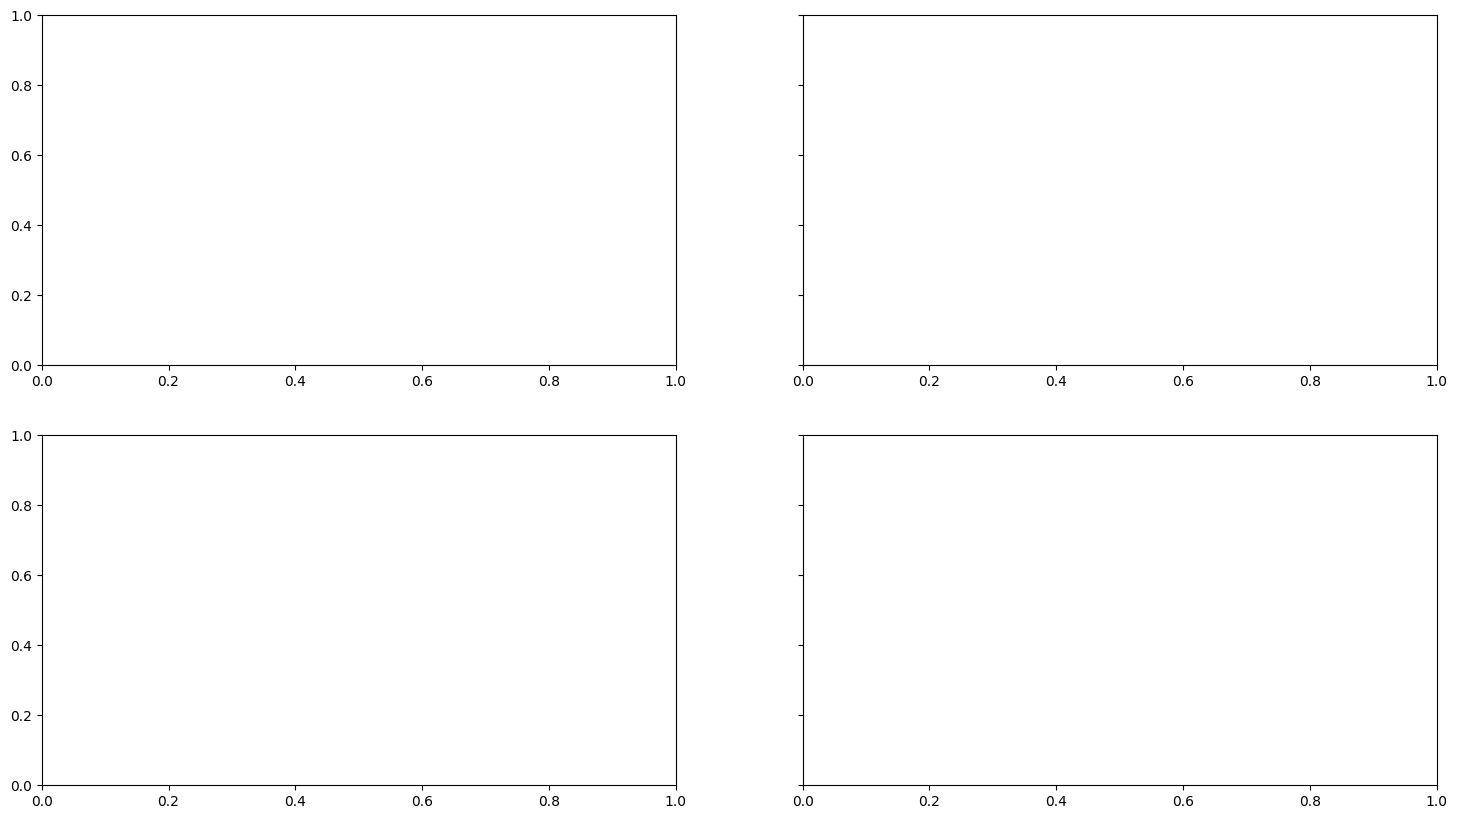

In [28]:
#creating subplots
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(18,10),sharey=True)
axes = axes.flatten()







Text(0, 0.5, 'AgeMonths')

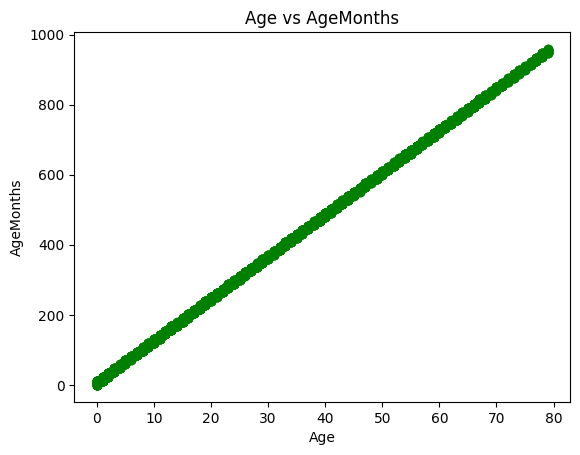

In [29]:
#scattter plots
plt.scatter(df['Age'], df['AgeMonths'],color='green')
plt.title('Age vs AgeMonths')
plt.xlabel('Age')
plt.ylabel('AgeMonths')


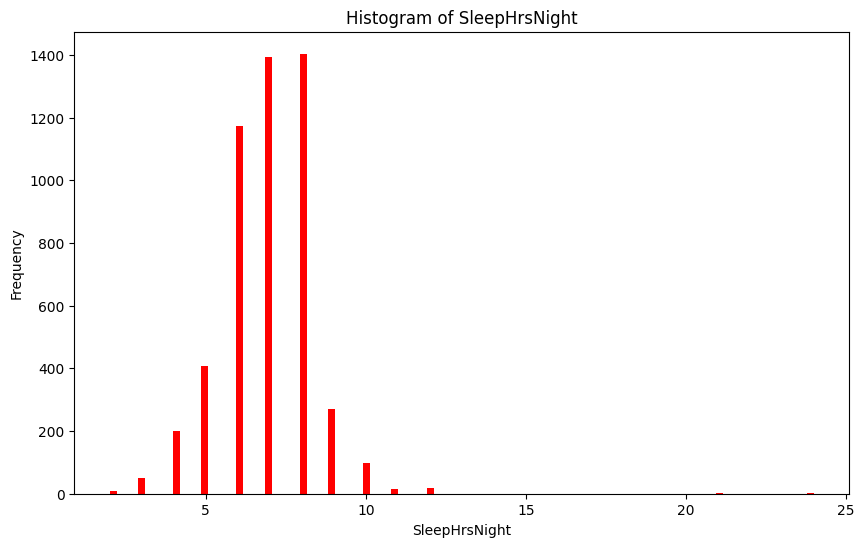

In [30]:
##plotting histograms for sleepnighthours
plt.figure(figsize=(10,6))
plt.hist(df['SleepHrsNight'].dropna(),color='red',bins=100)
plt.title('Histogram of SleepHrsNight')
plt.xlabel('SleepHrsNight')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'BMI')

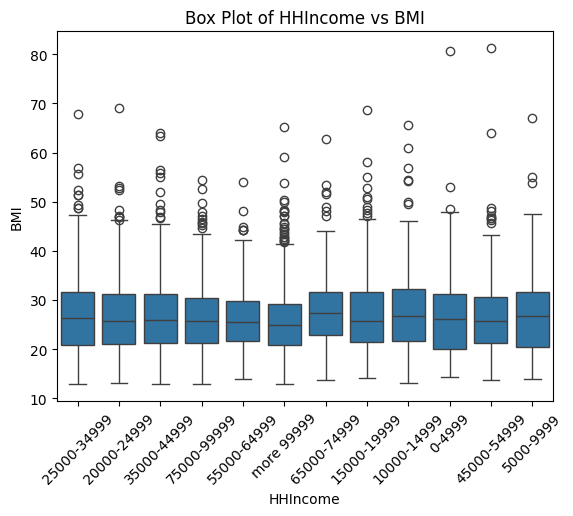

In [31]:
#plotting the box plots
import seaborn as sns
sns.boxplot(x = 'HHIncome',y= 'BMI',data=df)
plt.title('Box Plot of HHIncome vs BMI')
plt.xticks(rotation=45)
plt.xlabel('HHIncome')
plt.ylabel('BMI')

Text(0.5, 0, 'HHIncome')

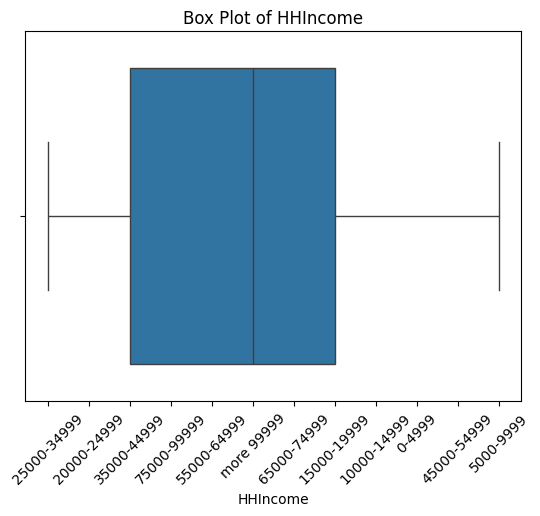

In [32]:
import seaborn as sns
sns.boxplot(x = 'HHIncome',data=df)
plt.title('Box Plot of HHIncome')
plt.xticks(rotation=45)
plt.xlabel('HHIncome')


Text(0.5, 0, 'BMI')

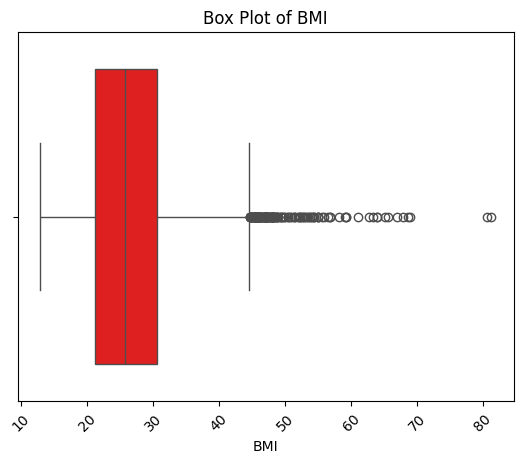

In [33]:
import seaborn as sns
sns.boxplot(x = 'BMI',color='red',data=df)
plt.title('Box Plot of BMI')
plt.xticks(rotation=45)
plt.xlabel('BMI')

Text(0.5, 0, 'BMI')

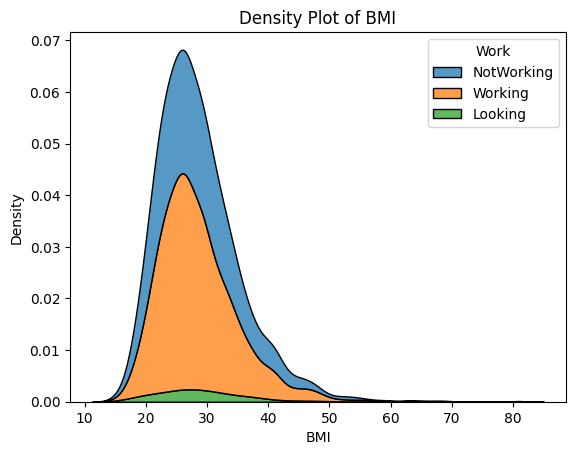

In [34]:
234#density plots
sns.kdeplot(data=df,x='BMI', hue='Work',multiple='stack')
plt.title('Density Plot of BMI')
plt.xlabel('BMI')

In [35]:
#####FREE TIME WORK
import pandas as pd
contingency_table = pd.crosstab(df['Gender'], df['Education'])
print(contingency_table)


Education  8th Grade  9 - 11th Grade  College Grad  High School  Some College
Gender                                                                       
female           165             293           648          508           776
male             194             331           598          485           647


In [36]:
contingency_table2 = pd.crosstab(df['MaritalStatus'], df['HHIncome'])
print(contingency_table2)


HHIncome       0-4999  10000-14999  15000-19999  20000-24999  25000-34999  \
MaritalStatus                                                               
Divorced           11           45           21           32           56   
LivePartner        11           21           28           25           47   
Married            19           81          114          132          216   
NeverMarried       38           82           72           67           86   
Separated           7           17           11           11           16   
Widowed            12           53           32           31           47   

HHIncome       35000-44999  45000-54999  5000-9999  55000-64999  65000-74999  \
MaritalStatus                                                                  
Divorced                48           40         29           28           16   
LivePartner             32           37         11           18           13   
Married                210          191         27          167